In [1]:
import pandas as pd 
import numpy as np 
import random
from math import log, sqrt 
from statistics import mode, mean
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# for the parkinsons dataset .... 

In [3]:
titanic_data_raw = pd.read_csv("datasets/titanic.csv")
print(titanic_data_raw.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')


In [4]:
#returns a processed Dataframe for the Loan dataset
# *Notes* 
# left the 3+ in dependents and changed values to a string to handle this column as a catagorical attribute.
# Leaving the loan amount term as numerical, could be a categorical value if we assume these are the only terms the bank is 
# looking at
def load_data_titanic():
    titanic_data = pd.read_csv("datasets/titanic.csv")
#     Removing passenger name so trees dont overfit to it
    columns_to_drop = ['Name']
    titanic_data = titanic_data.drop(columns_to_drop,axis=1)
    
    return titanic_data
titanic_data = load_data_titanic()
titanic_data

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000
883,1,1,female,19.0,0,0,30.0000
884,0,3,female,7.0,1,2,23.4500
885,1,1,male,26.0,0,0,30.0000


In [5]:
#information about each column
print(titanic_data.dtypes)
for col in titanic_data.columns:
    print(f"{col}: {titanic_data[col].unique()}")

Survived                     int64
Pclass                       int64
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object
Survived: [0 1]
Pclass: [3 1 2]
Sex: ['male' 'female']
Age: [22.   38.   26.   35.   27.   54.    2.   14.    4.   58.   20.   39.
 55.   23.   31.   34.   15.   28.    8.   19.   24.   40.   48.   18.
 66.   42.   21.    3.   30.   16.    7.   49.   29.   65.   46.   28.5
  5.   11.   45.   64.   17.   32.   25.    0.83 33.   59.   71.   37.
 47.   14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.
 60.   61.   56.   50.   36.   45.5  20.5  62.   41.   52.   63.   57.
 23.5   0.92 43.   10.   13.    0.75 69.   53.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
Siblings/Spouses Aboard: [1 0 3 4 2 5 8]
Parents/Children Aboard: [0 1 2 5 3 4 6]
Fare: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625

In [6]:
titanic_data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [7]:
CATEGORICAL_COLS = ['Pclass','Sex']

BINARY_COLS = []

CLASS_LABEL = 'Survived'

NUMERICAL_COLS = ['Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare']

CATEGORICAL_COLS_DICT = {}
for col in CATEGORICAL_COLS:
    CATEGORICAL_COLS_DICT[col] = titanic_data[col].unique()
# {"WifeEducation":[1,2,3,4], 
#                          "HusbandEducation":[1,2,3,4], 
#                          "WifeReligion":[0,1], 
#                          "WifeWorking":[0,1],
#                          "HusbandOccupation":[1,2,3,4], 
#                          "LivingStandardIndex":[1,2,3,4] ,
#                          "MediaExposure":[0,1]}
# print(CATEGORICAL_COLS_DICT)
MAX_TREE_DEPTH = 4


In [8]:
def compute_information_gain(data, attributes, label_col_name, debug=False):
    best_attribute = None 
    best_info_gain = None 
    best_attrs_value_len = None
    best_attributes_attribute_value = []
    # base information gain 
    total_rows = len(data)
    unique_labels = data[label_col_name].unique()
    
    #calculate the base information gain for calculation later on 

    base_info_gain = 0
    overall_label_probs = [] 
    for label in unique_labels:
        overall_label_prob = len(data[data[label_col_name]==label])/ total_rows 
        base_info_gain = base_info_gain - overall_label_prob*log(overall_label_prob,2)
        overall_label_probs.append(overall_label_prob)
    
    #iterate through given attributes in this case 
    for attribute in attributes:
        attribute_values = data[attribute].unique() # need to find the unique values for the attribute 
        attribute_entropies = []
        attribute_lengths = [] 
        # We need to observe where this attribute is 0, 1, and 2 to calculate the entropy 
        # and for each do the calculations where the target class is 0 and 1 
        
        if attribute in CATEGORICAL_COLS:        
            for attribute_value in attribute_values: 
                total_attribute_type = len(data[data[attribute]==attribute_value])
                if total_attribute_type == 0:
                    attribute_type_entropy = 0 
                else:
                    attribute_type_entropy = 0 

                    for label in unique_labels:
                        attr_label_prob = len(data[(data[attribute]==attribute_value)&(data[label_col_name]==label)])/total_attribute_type
                        if attr_label_prob != 0:
                            attribute_type_entropy = attribute_type_entropy - attr_label_prob*log(attr_label_prob,2)
                attribute_entropies.append(attribute_type_entropy)
                attribute_lengths.append(total_attribute_type)
        else: # this means that it is numeric 

            # either the attribute value is greater than or less than the average 
            attr_avg = mean(data[attribute])
            attribute_values = ["greater_than" ,"less_than"]
            for attribute_value in attribute_values:
                if attribute_value == "greater_than":
                    total_attribute_type = len(data[data[attribute]>attr_avg])
                else:
                    total_attribute_type = len(data[data[attribute]<=attr_avg])
                if total_attribute_type == 0:
                    attribute_type_entropy = 0 
                else:
                    attribute_type_entropy = 0 

                    for label in unique_labels:
                        if attribute_value == "greater_than":
                            # error here 
                            attr_label_prob = len(data[(data[attribute]>attr_avg)&(data[label_col_name]==label)])/total_attribute_type
                        else: 
                            attr_label_prob = len(data[(data[attribute]<=attr_avg)&(data[label_col_name]==label)])/total_attribute_type
                        
                        if attr_label_prob != 0:
                            attribute_type_entropy = attribute_type_entropy - attr_label_prob*log(attr_label_prob,2)
                attribute_entropies.append(attribute_type_entropy)
                attribute_lengths.append(total_attribute_type)

            
       
        #use all the calculations above to produce the total entropy and the information gain 
        total_entropy = 0
        for i in range(len(attribute_values)):
            total_entropy = total_entropy + (attribute_lengths[i]/ total_rows * attribute_entropies[i])
        gain = base_info_gain - total_entropy

        # storing the attribute if it is the attribute with the best information gain 
        if not best_info_gain:
            best_info_gain = gain 
            best_attribute = attribute
            best_attrs_value_len = len(attribute_values) if len(attribute_values) < 10 else 2 
            best_attributes_attribute_value = attribute_values
        else: 
            if best_info_gain < gain:
                best_info_gain = gain 
                best_attribute = attribute
                best_attrs_value_len = len(attribute_values) if len(attribute_values) < 10 else 2 
                best_attributes_attribute_value = attribute_values
        
    return best_info_gain, best_attribute, list(best_attributes_attribute_value)

In [9]:
class root():
    def __init__(self, label_col_name, data) -> None:
        self.train_data = data 
        self.child_nodes = []
        self.best_attribute = None
        self.label_col_name = label_col_name

        self.train_decision_tree()

    def train_decision_tree(self):
        # finding the inital attribute to split on 
        attributes = [col for col in self.train_data.columns if col != self.label_col_name]
        unique_class_labels = self.train_data[self.label_col_name].unique()
        majority_class = None
        max_class_frequency = 0 
        for label in unique_class_labels: 
            class_frequency = len(self.train_data[self.train_data[self.label_col_name] == label])
            if majority_class == None:
                majority_class = label 
                max_class_frequency = class_frequency
            else: 
                if max_class_frequency < class_frequency:
                    max_class_frequency = class_frequency
                    majority_class = label 

        # compute the best attribute using information gain 
        # choose a random set of attributes 
        num_attrs = int(sqrt(len(attributes)))
        attrs_to_use = random.choices(attributes, k=num_attrs)
        _, best_attribute, attribute_values = compute_information_gain(self.train_data, attrs_to_use, self.label_col_name)

        # split the dataset based on the attribute values (0,1,2) and create three child nodes 
        depth = 1 
        initial_child_nodes = [] 

        if best_attribute in CATEGORICAL_COLS:
            attribute_values = CATEGORICAL_COLS_DICT[best_attribute]
            for r in attribute_values: 
                child_node = Node(self.label_col_name, self.train_data[self.train_data[best_attribute]==r], best_attribute, r, attributes, majority_class, depth)
                initial_child_nodes.append(child_node)
        else:
            attr_avg = mean(self.train_data[best_attribute])
            child_node_one = Node(self.label_col_name, self.train_data[self.train_data[best_attribute]>attr_avg], best_attribute, attr_avg, attributes, majority_class, depth, greater_than=True)
            child_node_two = Node(self.label_col_name, self.train_data[self.train_data[best_attribute]<=attr_avg], best_attribute, attr_avg, attributes, majority_class, depth, greater_than=False)
            initial_child_nodes = [child_node_one,child_node_two]
        
        self.child_nodes = initial_child_nodes
        self.best_attribute = best_attribute

    def find_class(self, row, node, depth):
        # iterate/ search decision tree to fin the desired target class 
        depth = depth+1
        # termination case
        if node.is_leaf_node:
            return node.target_class
        else: 
            #child_attribute_value to select next attribute
            attr = node.child_nodes[0].my_attribute
            
            #selecting the next branch 
            row_attr_val = row[attr]
            next_node = None
            if attr in CATEGORICAL_COLS: 
                for child in node.child_nodes:
                    if row_attr_val == child.my_attribute_value:
                        next_node = child
            else: 
                child_attr_val = node.child_nodes[0].my_attribute_value
                if row_attr_val> child_attr_val:
                    for child in node.child_nodes:
                        if child.greater_than:
                            next_node = child
                else: 
                    for child in node.child_nodes:
                        if not child.greater_than:
                            next_node = child
            if next_node == None:
                x ="Sad"
            return self.find_class(row, next_node, depth)




    def run_experiment_decision_tree(self, data):
        count = 0 
        predictions = [] 
        for index, row in data.iterrows():
            next_node = None 
            row_attr_val = row[self.best_attribute]

            if self.best_attribute in CATEGORICAL_COLS:
                for child in self.child_nodes:
                    if row_attr_val == child.my_attribute_value:
                        next_node = child
            else:
                child_attr_val = self.child_nodes[0].my_attribute_value
                if row_attr_val> child_attr_val:
                    for child in self.child_nodes:
                        if child.greater_than:
                            next_node = child
                else:
                    for child in self.child_nodes:
                        if not child.greater_than:
                            next_node = child
            # error here 
            if next_node == None:
                x= "Sad"
            final_class = self.find_class(row, next_node, 1)
            if final_class == row[self.label_col_name]:
                count = count + 1
            predictions.append(final_class)
        return count/len(data), predictions


In [10]:
class Node():
    def __init__(self, label_col_name,  data, my_attribute, attribute_value, attributes, my_parent_majority_class, depth,  greater_than = None):
        # storing the data, attribute and attribute value on which this node was created on and the 
        # remaining attributes 
        self.my_data = data 
        self.my_attribute = my_attribute
        self.my_attribute_value = attribute_value
        self.my_attributes = attributes 
        self.depth = depth + 1 
        self.label_col_name = label_col_name
        self.greater_than = greater_than
        # only for the instance the data is empty, should become the target class 
        self.my_parent_majority_class = my_parent_majority_class 
        
        #these will be set thoughout the remaining logic 
        self.is_leaf_node = False 
        self.child_nodes = None 
        self.target_class = None
        
        
        total_data_instance = len(data)
        # TODO fix this from hardcoding
        # target_class_zero_len = len(data[data["class"]==0])
        # target_class_one_len = len(data[data["class"]==1])
        
        unique_class_labels = data[self.label_col_name].unique()
        majority_class = None
        max_class_frequency = 0 
        for label in unique_class_labels: 
            class_frequency = len(self.my_data[self.my_data[self.label_col_name] == label])
            if majority_class == None:
                majority_class = label 
                max_class_frequency = class_frequency
            else: 
                if max_class_frequency < class_frequency:
                    max_class_frequency = class_frequency
                    majority_class = label 

        # if there is no data then set the final target class as the parent majority class 
        # and then set the node as the leaf node 
        if total_data_instance == 0: 
            self.target_class = self.my_parent_majority_class
            self.is_leaf_node = True 
            
        else: 
            # if all the data belongs to target class 0 then set that as the final target class
            # and then the node as a leaf node 
            if total_data_instance == max_class_frequency:
                self.target_class = majority_class
                self.is_leaf_node = True 
            # there are no remaining attributes to split on so just set the target class to majority class in
            # the dataset
            elif len(attributes) ==0:
                # majority_class = 0 if target_class_zero_len> target_class_one_len else 1 
                self.target_class = majority_class
                self.is_leaf_node = True 
            elif self.depth == MAX_TREE_DEPTH:
                # majority_class = 0 if target_class_zero_len> target_class_one_len else 1 
                self.target_class = majority_class
                self.is_leaf_node = True 
            else:
                # find the majority target class (this will come in handy if there is an empty dataset for child node)
                #majority_class = 0 if target_class_zero_len> target_class_one_len else 1 

                # compute the best attribute using information gain 
                # choose a random set of attributes 
                num_attrs = int(sqrt(len(attributes)))
                attrs_to_use = random.choices(attributes, k=num_attrs)
                _, best_attribute, best_attributes_attribute_value = compute_information_gain(self.my_data, attrs_to_use, self.label_col_name)
                new_attrs = attributes
                # split the dataset base of the attribute values (0,1,2) and create three child nodes 
                child_nodes = [] 
                if best_attribute in CATEGORICAL_COLS:
                    attribute_values = CATEGORICAL_COLS_DICT[best_attribute]
                    # TODO: This is chard coded and may cause problems 
                    for r in attribute_values:
                        child_node = Node(self.label_col_name, data[data[best_attribute]==r], best_attribute, r, new_attrs, majority_class, self.depth)
                        child_nodes.append(child_node)
                else:
                    attr_avg = mean(data[best_attribute])
                    child_node_one = Node(self.label_col_name, data[data[best_attribute]>attr_avg], best_attribute, attr_avg, new_attrs, majority_class, self.depth, greater_than=True)
                    child_node_two = Node(self.label_col_name, data[data[best_attribute]<=attr_avg], best_attribute, attr_avg, new_attrs, majority_class, self.depth, greater_than=False)
                    child_nodes = [child_node_one,child_node_two]
                self.child_nodes = child_nodes
                #self.child_nodes = [child_node_zero, child_node_one, child_node_two]

In [11]:
class forest():
    def __init__(self, label_col_name, n_trees, chunks, valid_chunks) -> None:
        self.n_trees = n_trees
        self.chunks = chunks 
        self.trees = [] 
        self.valid_chunks = valid_chunks
        self.label_col_name = label_col_name
        # here we need to implement a bootstrapping algorithm where each tree needs to recieve a synthetic dataset 
        for i in range(self.n_trees):
            train_data = self.create_synthetic_dataset()
            # each tree needs to get a synthetic dataset 
            tree = root(self.label_col_name, train_data)
            self.trees.append(tree)

    def test(self, test_data):
        tree_predictions = []
        for tr in self.trees: 
            _, test_preds = tr.run_experiment_decision_tree(test_data)
            tree_predictions.append(test_preds)
        # find the majority vote for each prediction 
        majority_preds = [mode([preds[i] for preds in tree_predictions]) for i in range(len(test_data))]
        return majority_preds
    
    def create_synthetic_dataset(self):
        # pick some random chunks 
        random_pick = [random.choice(self.valid_chunks) for d in range(len(self.valid_chunks))]
        all_data = [self.chunks[val] for val in random_pick]
        all_data_concated = pd.concat(all_data)
        return all_data_concated


In [12]:
def plot_decision_tree_distribution(data, name=""):
    standard_deviation = np.std(data)
    standard_deviation_stringified = "{:1.4f}".format(standard_deviation)
    _ = plt.hist(data, bins= 30)
    title = name + " std =" + standard_deviation_stringified
    plt.title(title)
    plt.show()

In [13]:
def plot_forest_data(n_trees, data, dataset_name, metric):
    plt.scatter(n_trees, data)
    title = dataset_name + metric 
    plt.title(title)
    plt.xlabel("N Trees")
    plt.ylabel(metric)
    plt.show()

In [14]:
def create_stratified_training_chunks(in_data):
    label_col = CLASS_LABEL
    
    class_zero_data =in_data[in_data[label_col] == 0 ]
    class_one_data = in_data[in_data[label_col] == 1 ]
#     class_two_data = loan_data[loan_data[label_col] == 3 ]


    chunks = {} 
    total_k = 10
    class_zero_chunk_len = int(round(len(class_zero_data)/ total_k))
    class_one_chunk_len = int(round(len(class_one_data)/ total_k))
#     class_two_chunk_len = int(round(len(class_two_data)/ total_k))

    for k in range(total_k):
        if k < total_k -1:
            class_zero_chunk = class_zero_data[k*class_zero_chunk_len:(k+1)*class_zero_chunk_len]
            class_one_chunk = class_one_data[k*class_one_chunk_len:(k+1)*class_one_chunk_len]
#             class_two_chunk = class_two_data[k*class_two_chunk_len:(k+1)*class_two_chunk_len]
            chunks[k] = pd.concat([class_zero_chunk,class_one_chunk])
            
            
        else:
            class_zero_chunk = class_zero_data[k*class_zero_chunk_len:]
            class_one_chunk = class_one_data[k*class_one_chunk_len:]
#             class_two_chunk = class_one_data[k*class_two_chunk_len:]
            chunks[k] = pd.concat([class_zero_chunk,class_one_chunk])
    return chunks, label_col, in_data

In [15]:
def get_tp_fp_tn_fn(test_set_actuals, preds, positive_class):
    # may need to alter this to just be one class, 'Y' in this case...
    TP = 0
    FN = 0
    FP = 0
    TN = 0 
    for i in range(len(test_set_actuals)):
        if test_set_actuals[i] == positive_class:
            if preds[i] == positive_class:
                TP = TP + 1 
            else: 
                FN = FN + 1 
        else:
            if preds[i] == positive_class:
                FP = FP + 1 
            else: 
                TN = TN + 1 
    recall = TP/(TP + FN) if (TP + FN) != 0 else 0 
    precision = TP/(TP + FP) if (TP + FP) != 0 else 0 
    f1_score = 2 * precision*recall/(precision + recall) if (precision + recall) != 0 else 0
    accuracy = (TP + TN)/ (TP+FP+TN+FN)
    return recall, precision, f1_score

k:  0
k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9


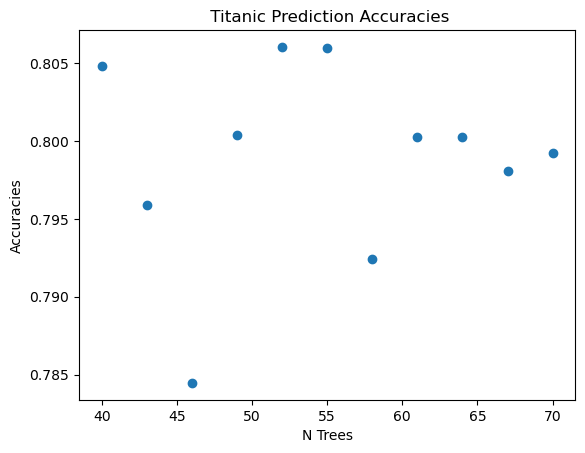

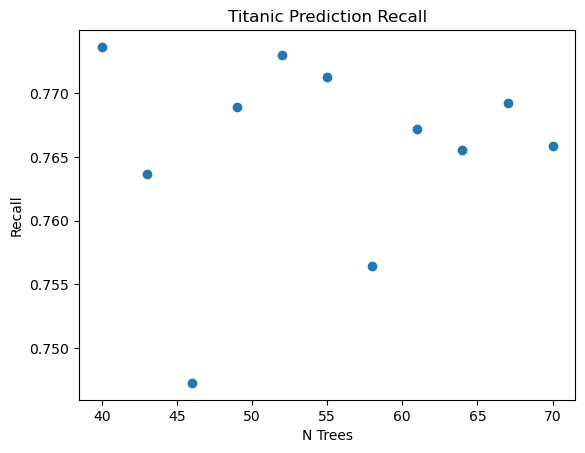

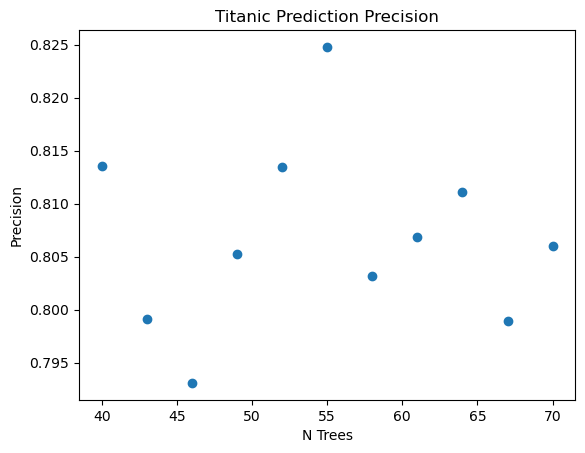

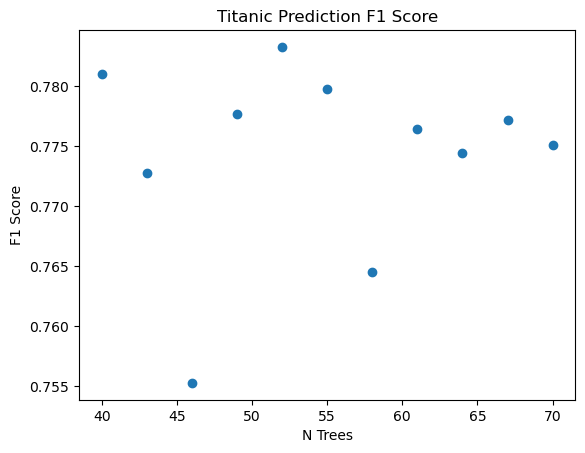

Titanic Prediction Accuracies
{40: 0.8048325358851675, 43: 0.7959090909090909, 46: 0.7844617224880382, 49: 0.8003708133971292, 52: 0.8060526315789474, 55: 0.8059688995215311, 58: 0.7924162679425837, 61: 0.8002870813397129, 64: 0.8002870813397129, 67: 0.7980980861244019, 70: 0.7992344497607655}
Titanic Prediction Recall
{40: 0.7736526531516561, 43: 0.7636853328902182, 46: 0.7472573021675714, 49: 0.7689413241756213, 52: 0.7730198294006868, 55: 0.771310605221373, 58: 0.7564685572910897, 61: 0.7672224068535136, 64: 0.7655884199254089, 67: 0.7692648905136442, 70: 0.7658302869170267}
Titanic Prediction Precision
{40: 0.8135884086719052, 43: 0.799108040675336, 46: 0.7930879599438411, 49: 0.8052772091683692, 52: 0.8134096381848815, 55: 0.8247792216131057, 58: 0.8032007496936403, 61: 0.8068918395360839, 64: 0.8110514365229583, 67: 0.7988893342828388, 70: 0.8060295904271849}
Titanic Prediction F1 Score
{40: 0.7810509285849183, 43: 0.7727903308359456, 46: 0.7552424636187632, 49: 0.777706146146185

In [18]:
def run_loan():
    total_k = 10 
    chunks, label,  _ = create_stratified_training_chunks(titanic_data)
#     n_trees_to_run = [1, 5, 10, 20, 30, 40, 50,100]
    n_trees_to_run = n_trees_to_run = [40,43,46,49,52,55,58,61,64,67,70]
    unique_label_classes  = [0, 1]

    n_tree_dict_accuracy = {n:[] for n in n_trees_to_run}
    n_tree_dict_recall = {n:[] for n in n_trees_to_run}
    n_tree_dict_precision= {n:[] for n in n_trees_to_run}
    n_tree_dict_f1_score = {n:[] for n in n_trees_to_run}    
    for k in range(total_k):
        print("k: ",k)
        to_choose_from = [c for c in range(total_k) if c != k ]
        test_set = chunks[k]
        # send to forest 

        for n_tree in n_trees_to_run:
            rf = forest(label, n_tree, chunks, to_choose_from)
            preds = rf.test(test_set)
            test_set_actuals = list(test_set[label])
            count = 0 
            for i in range(len(test_set)):
                if test_set_actuals[i] == preds[i]:
                    count = count + 1 
            testing_accuracy = count/len(test_set)
            temp_recalls = []
            temp_precisions = []
            temp_f1_scores = []

            for unique_label in unique_label_classes:
                recall, precision, f1_score = get_tp_fp_tn_fn(test_set_actuals, preds, unique_label)
                temp_recalls.append(recall)
                temp_precisions.append(precision)
                temp_f1_scores.append(f1_score)
            
            n_tree_dict_accuracy[n_tree].append(testing_accuracy)          
            n_tree_dict_recall[n_tree].append(mean(temp_recalls))
            n_tree_dict_precision[n_tree].append(mean(temp_precisions))
            n_tree_dict_f1_score[n_tree].append(mean(temp_f1_scores))      

    n_tree_dict_accuracy_average = {n:None for n in n_trees_to_run}
    n_tree_dict_recall_average = {n:None for n in n_trees_to_run}
    n_tree_dict_precision_average = {n:None for n in n_trees_to_run}
    n_tree_dict_f1_score_average = {n:None for n in n_trees_to_run}
    for value in n_trees_to_run:
        n_tree_dict_accuracy_average[value] = mean(n_tree_dict_accuracy[value])
        n_tree_dict_recall_average[value] = mean(n_tree_dict_recall[value])
        n_tree_dict_precision_average[value] = mean(n_tree_dict_precision[value])
        n_tree_dict_f1_score_average[value] = mean(n_tree_dict_f1_score[value])

    plot_forest_data(n_tree_dict_accuracy_average.keys(), n_tree_dict_accuracy_average.values(), " Titanic Prediction ", "Accuracies")
    plot_forest_data(n_tree_dict_recall_average.keys(), n_tree_dict_recall_average.values(), "Titanic Prediction ",  "Recall")
    plot_forest_data(n_tree_dict_precision_average.keys(), n_tree_dict_precision_average.values(), "Titanic Prediction ", "Precision")
    plot_forest_data(n_tree_dict_f1_score_average.keys(), n_tree_dict_f1_score_average.values(), "Titanic Prediction ", "F1 Score")
    
    print("Titanic Prediction Accuracies")
    print (n_tree_dict_accuracy_average)
    print("Titanic Prediction Recall")
    print (n_tree_dict_recall_average)
    print("Titanic Prediction Precision")
    print (n_tree_dict_precision_average)
    print("Titanic Prediction F1 Score")
    print (n_tree_dict_f1_score_average)


run_loan()